In [60]:
import numpy as np, pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os

import warnings
warnings.simplefilter (action='ignore', category=FutureWarning)


In [61]:
#convert T1/T2 nvj rate analysis data into one DataFrame.
#current expected files are <sample>_<expt>rates.txt and <sample>_<expt>tau.txt # adjust as needed
#python note: sample is a protected word, can't use blah_df.sample because it means something else

data_dir = '/home/tuttle/data/nmrdata/gal4_ABD1/gal4AD_t1t2/fits'

#samples = ['WT', 'WTMannose', 'L34A','L34AMannose','L34K','L34KMannose','27C-34C','27C-34CMannose']
samples = ['gal4AD','gal4AD_ABD1']
residues = range(830,882) #I have numbered side chain residues as e.g. 840.ne is 8400, otherwise get duplicate residues
exp=['T1','T2']

newrows=[]

for sample in samples:
    for expt in exp:
        f=os.path.join(data_dir,sample+"_"+expt+"rates.txt")
        df=os.path.join(data_dir,sample+"_"+expt+"tau.txt")
        
        delaydict=dict()

        delayobject = open(df)
        for line in delayobject:
            values = line.rstrip().replace('\t',' ').split(' ')
            if len(values)==2:   #ignore blank lines at end of file
                delaydict['T'+values[0]]=float(values[1])
            #print(values)
        #print(delaydict)

        data = pd.read_csv(f,delimiter="\t").dropna()
        for record in data.to_records():
                for i in range(1,len (delaydict)+1): #since there are 8 delays used for each experiment
                        newrow = {'Residue':int(record['Residue']), #removed conversion to string to autosort residue order
                                  'sample':sample,
                                  'expt':expt,
                                  'Intensity':record['T'+str(i)],
                                  'delay':delaydict['T'+str(i)]}
                        newrows.append(newrow)

dynamics=pd.DataFrame.from_records(newrows)

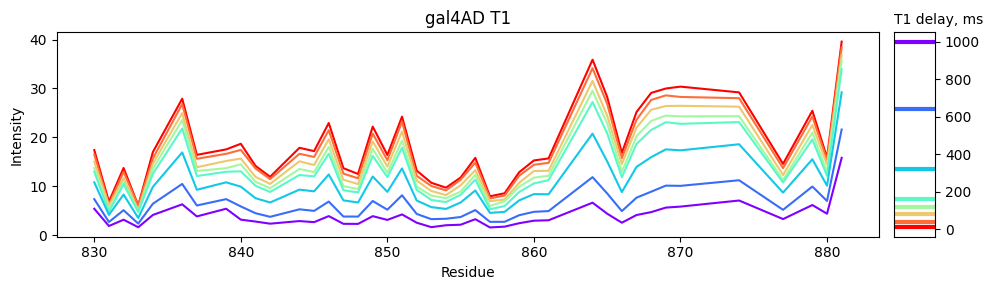

In [62]:
sample = 'gal4AD'
expt = 'T1'
fig, ax = plt.subplots(1,2,figsize=(10, 3), gridspec_kw={'width_ratios':[20,1]} )
plot_data = dynamics.copy()[(dynamics['sample'] == sample) & (dynamics['expt']==expt)]
plot_data = plot_data[plot_data['Residue'].isin(residues)]
delays = sorted(plot_data['delay'].unique())
color = iter(cm.rainbow(np.linspace(1,0,len(delays))))

for delay in delays:
    c = next(color)
    plot_data[plot_data['delay']==delay].plot(x='Residue',y='Intensity',ax=ax[0],c=c)
    ax[0].set_ylabel("Intensity")
    ax[1].plot([0,1],[delay,delay],color=c,linewidth=3)
    ax[1].yaxis.tick_right()
    ax[1].axes.get_xaxis().set_visible(False)
ax[0].get_legend().remove()
ax[0].set_title(sample+" "+expt)
ax[1].set_title(expt+" delay, ms",fontsize=10, loc="left")
#fig.suptitle(sample+" "+expt)
fig.tight_layout()
plt.show()